In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [67]:
# Load the dataset
df = pd.read_csv('retail.csv')

In [68]:
# Print the first 5 rows of the dataset
print(df.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [69]:
# Check the data types of each column
print(df.dtypes)

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object


In [70]:
# Check for missing values
print(df.isnull().sum())

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64


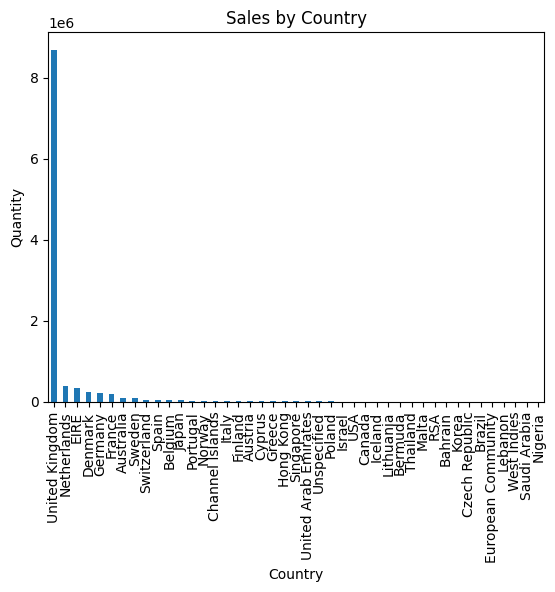

In [71]:
# Visualize the distribution of sales by country
df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Sales by Country')
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.show()

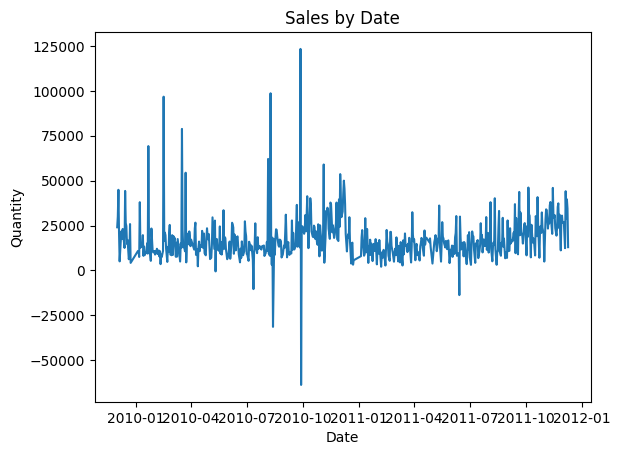

In [72]:
# Visualize the distribution of sales by date
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.groupby(df['InvoiceDate'].dt.date)['Quantity'].sum().plot()
plt.title('Sales by Date')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()

In [73]:
# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [74]:
# Create a new column for total sales
df['TotalSales'] = df['Quantity'] * df['Price']

In [75]:
# Segment the data by country and calculate the total sales for each country
sales_by_country = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)

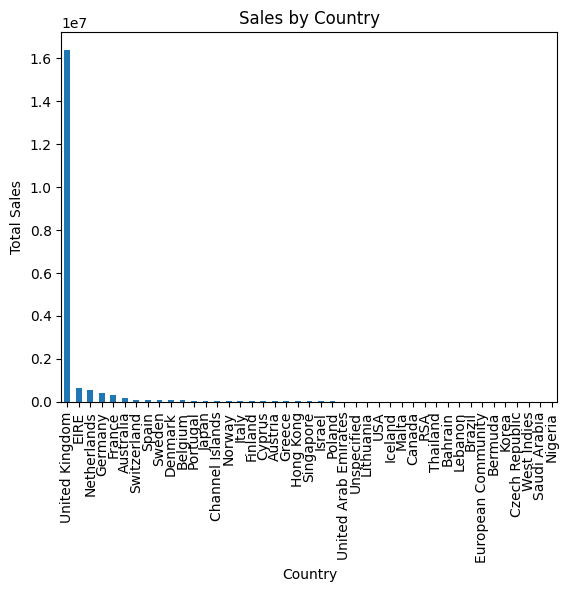

In [76]:
# Visualize the distribution of sales by country
sales_by_country.plot(kind='bar')
plt.title('Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

In [77]:
# Segment the data by market and calculate the total sales for each market
df['Market'] = df['Country'].apply(lambda x: 'UK' if x == 'United Kingdom' else 'International')
sales_by_market = df.groupby('Market')['TotalSales'].sum().sort_values(ascending=False)

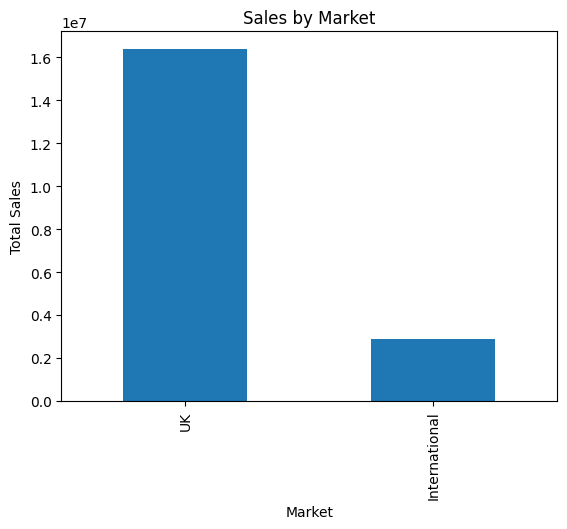

In [78]:
# Visualize the distribution of sales by market
sales_by_market.plot(kind='bar')
plt.title('Sales by Market')
plt.xlabel('Market')
plt.ylabel('Total Sales')
plt.show()

In [79]:
# Segment the data by product and calculate the average price and total sales for each product
sales_by_product = df.groupby('Description').agg({'Price': 'mean', 'TotalSales': 'sum'})

In [80]:
sales_by_product['Price'].isna().sum()

0

In [81]:
mean_price = sales_by_product['Price'].mean()
sales_by_product['Price'].fillna(mean_price, inplace=True)

In [82]:
# Fit a linear regression model to the data to predict sales based on price
X = sales_by_product['Price'].values.reshape(-1, 1)
y = sales_by_product['TotalSales'].values.reshape(-1, 1)
model = LinearRegression().fit(X, y)

In [83]:
# Calculate the optimal price for each product based on the linear regression model
sales_by_product['OptimalPrice'] = model.predict(sales_by_product['Price'].values.reshape(-1, 1))

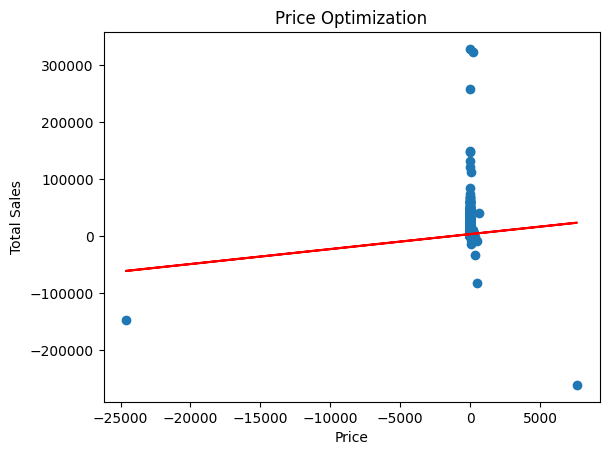

In [84]:
# Visualize the relationship between price and sales using a scatter plot
plt.scatter(sales_by_product['Price'], sales_by_product['TotalSales'])
plt.plot(sales_by_product['Price'], sales_by_product['OptimalPrice'], color='red')
plt.title('Price Optimization')
plt.xlabel('Price')
plt.ylabel('Total Sales')
plt.show()

In [85]:
# Segment the data by product and location and calculate the total sales for each product and location
sales_by_product_location = df.groupby(['Description', 'Country'])['TotalSales'].sum()

In [86]:
# Segment the data by product and location and calculate the total quantity sold for each product and location
quantity_by_product_location = df.groupby(['Description', 'Country'])['Quantity'].sum()

In [87]:
# Calculate the demand forecast for each product and location based on historical sales data
demand_forecast = sales_by_product_location / quantity_by_product_location

In [88]:
# Calculate the optimal inventory allocation for each product and location based on the demand forecast and current inventory levels
inventory_allocation = demand_forecast / df.groupby(['Description', 'Country'])['Quantity'].count()

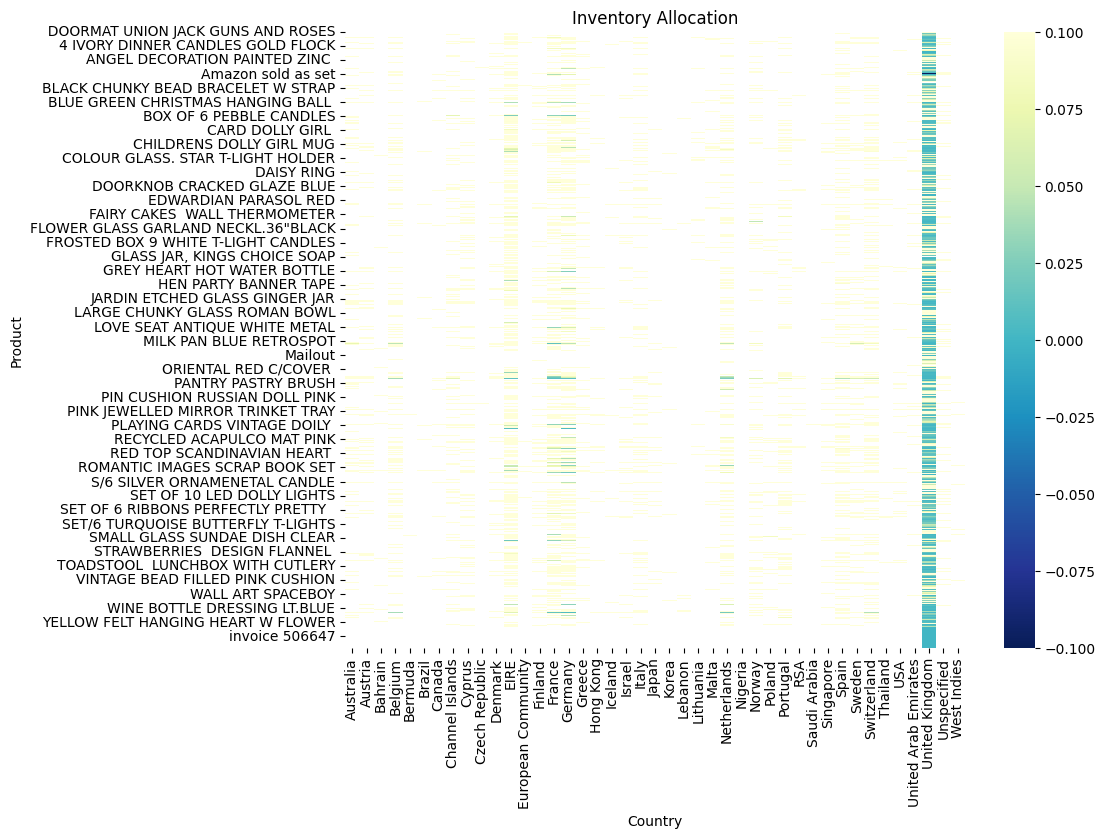

In [89]:
# Set the size of the figure
fig, ax = plt.subplots(figsize=(10, 8))
# Compute the minimum and maximum values for the data
vmin = inventory_allocation.min().min()
vmax = inventory_allocation.max().max()
# Visualize the optimal inventory allocation for each product and location using a heatmap
sns.heatmap(inventory_allocation.unstack(), ax=ax, cmap='YlGnBu_r', vmin=vmin, vmax=vmax)
ax.set_title('Inventory Allocation')
ax.set_xlabel('Country')
ax.set_ylabel('Product')

plt.show()

In [90]:
# Evaluate the performance of the pricing and inventory management strategies
sales_by_month = df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalSales'].sum()
inventory_by_month = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()

In [91]:
# Calculate the monthly revenue per product
revenue_by_product = df.groupby(['Description', df['InvoiceDate'].dt.to_period('M')])['TotalSales'].sum()

In [92]:
# Calculate the monthly revenue per product as a percentage of total revenue
revenue_pct_by_product = revenue_by_product / sales_by_month

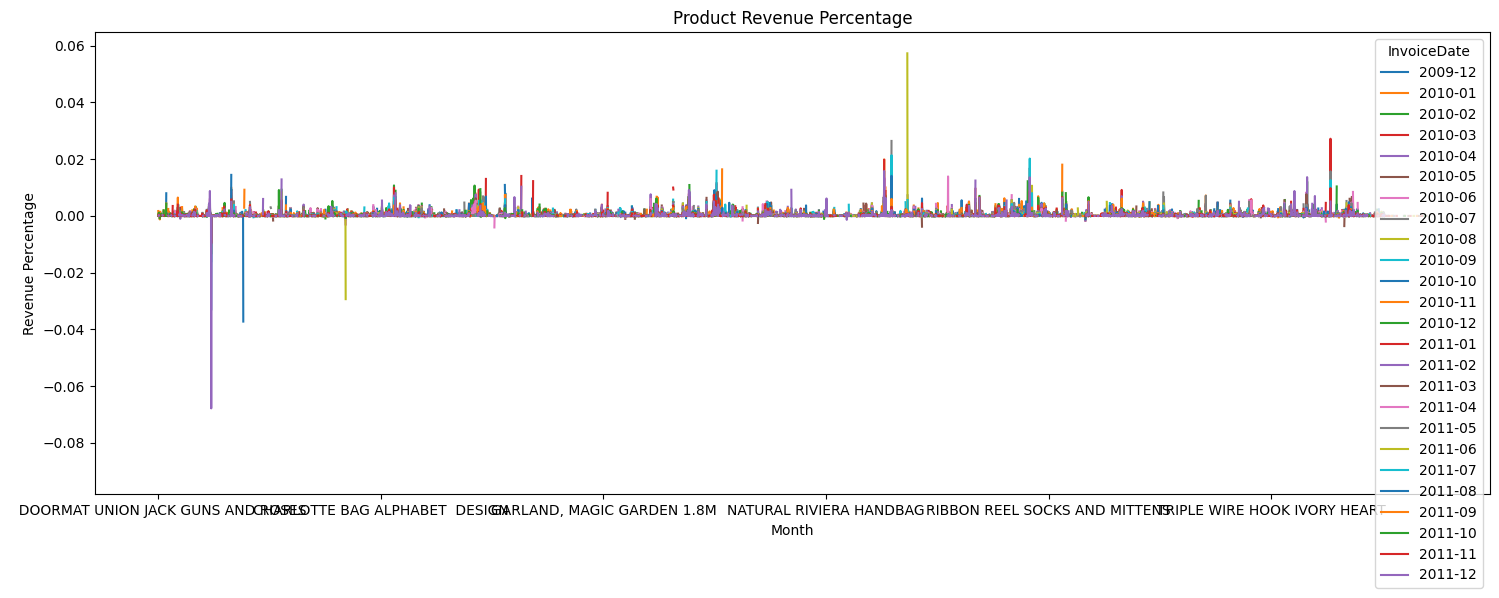

In [93]:
# Set the size of the figure
fig, ax = plt.subplots(figsize=(18, 6))

# Visualize the monthly revenue percentage for each product using a line chart
revenue_pct_by_product.unstack().plot(kind='line', ax=ax)
ax.set_title('Product Revenue Percentage')
ax.set_xlabel('Month')
ax.set_ylabel('Revenue Percentage')

plt.show()


In [94]:
import pandas as pd
import matplotlib.pyplot as plt

as we saw in this that UK data is mostly in it now we analyze only the UK data by filtering

In [95]:
# Load the dataset
fd = pd.read_csv('retail.csv')

In [96]:
# Filter the data to include only the UK market
fd = fd[fd['Country'] == 'United Kingdom']

In [97]:
# Convert InvoiceDate to datetime format
fd['InvoiceDate'] = pd.to_datetime(fd['InvoiceDate'])

In [98]:
# Create a new column for total sales
fd['TotalSales'] = fd['Quantity'] * fd['Price']

In [99]:
# Segment the data by product and calculate the average price and total sales for each product
sales_by_product = fd.groupby('Description').agg({'Price': 'mean', 'TotalSales': 'sum'})

In [100]:
# Fit a linear regression model to the data to predict sales based on price
X = sales_by_product['Price'].values.reshape(-1, 1)
y = sales_by_product['TotalSales'].values.reshape(-1, 1)
model = LinearRegression().fit(X, y)

In [101]:
# Calculate the optimal price for each product based on the linear regression model
sales_by_product['OptimalPrice'] = model.predict(sales_by_product['Price'].values.reshape(-1, 1))

In [102]:
# Segment the data by product and location and calculate the total sales for each product and location
sales_by_product_location = fd.groupby(['Description', 'Country'])['TotalSales'].sum()

In [103]:
# Segment the data by product and location and calculate the total quantity sold for each product and location
quantity_by_product_location = fd.groupby(['Description', 'Country'])['Quantity'].sum()

In [104]:
# Calculate the demand forecast for each product and location based on historical sales data
demand_forecast = sales_by_product_location / quantity_by_product_location

In [105]:
# Calculate the optimal inventory allocation for each product and location based on the demand forecast and current inventory levels
inventory_allocation = demand_forecast / fd.groupby(['Description', 'Country'])['Quantity'].count()

In [106]:
# Evaluate the performance of the pricing and inventory management strategies
sales_by_month = fd.groupby(fd['InvoiceDate'].dt.to_period('M'))['TotalSales'].sum()
inventory_by_month = fd.groupby(fd['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()

In [107]:
# Calculate the monthly revenue per product
revenue_by_product = fd.groupby(['Description', fd['InvoiceDate'].dt.to_period('M')])['TotalSales'].sum()

In [108]:
# Calculate the monthly revenue per product as a percentage of total revenue
revenue_pct_by_product = revenue_by_product / sales_by_month

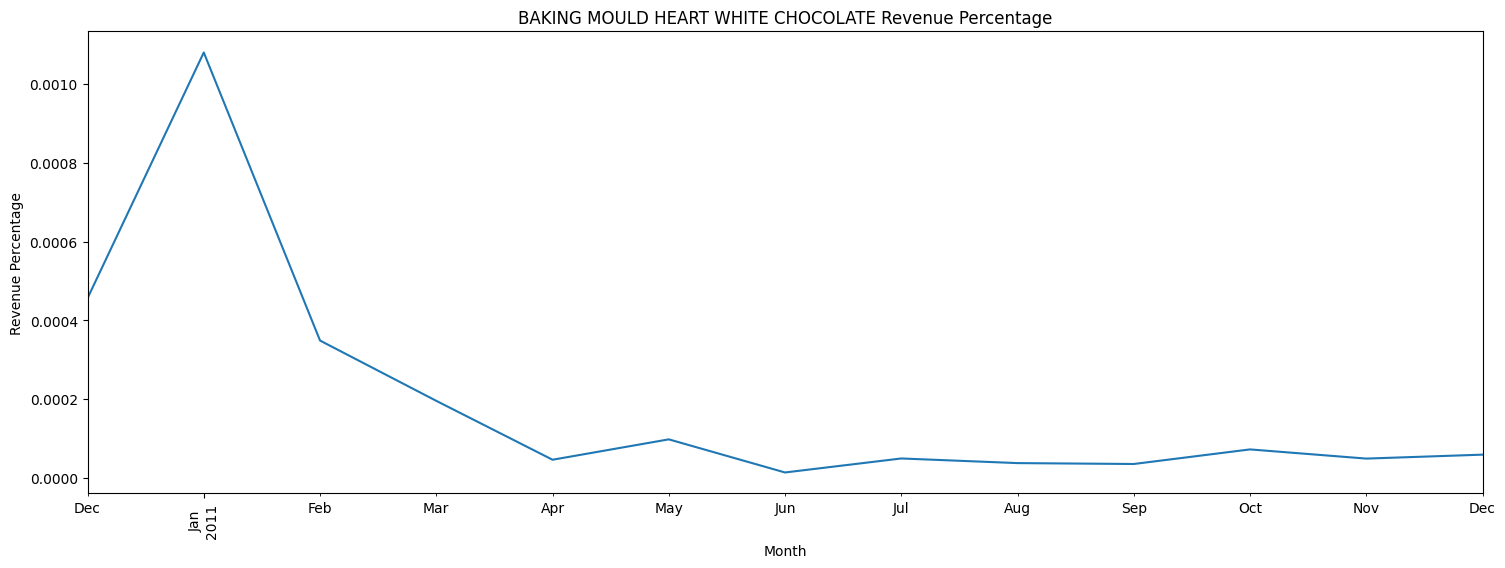

<ipython-input-130-c97096cb016b>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  line_chart.set_xticklabels(xlabels, rotation=90)


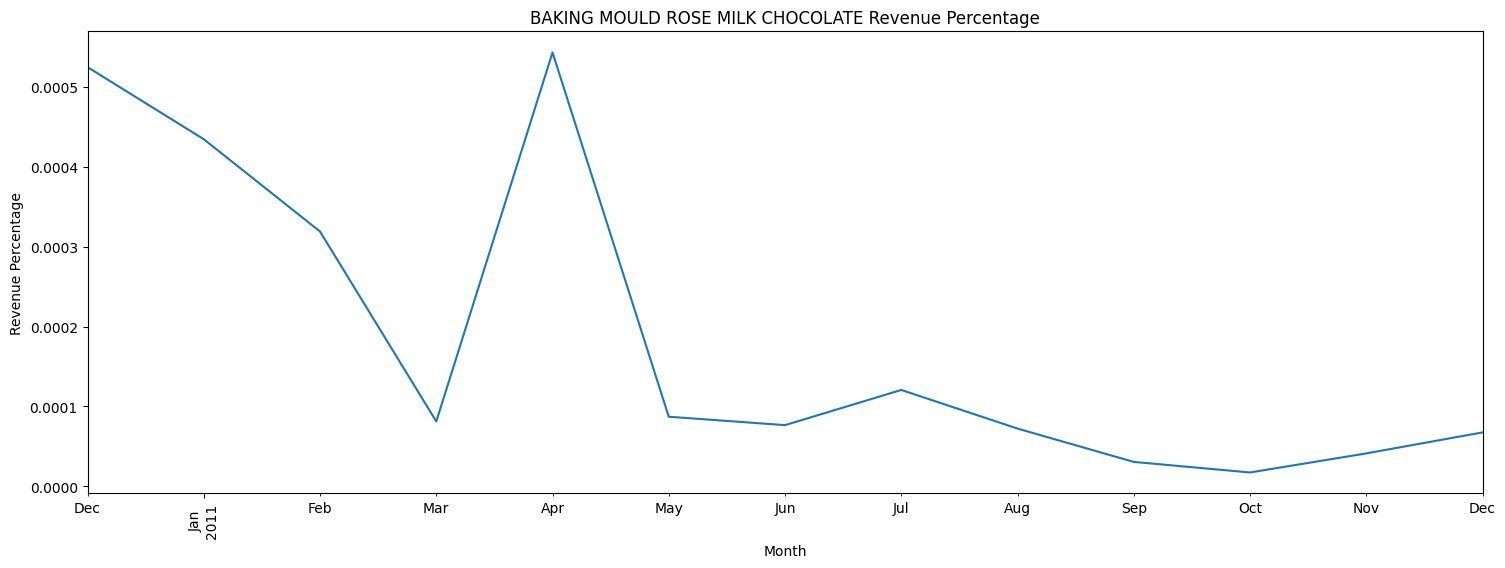

<ipython-input-130-c97096cb016b>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  line_chart.set_xticklabels(xlabels, rotation=90)


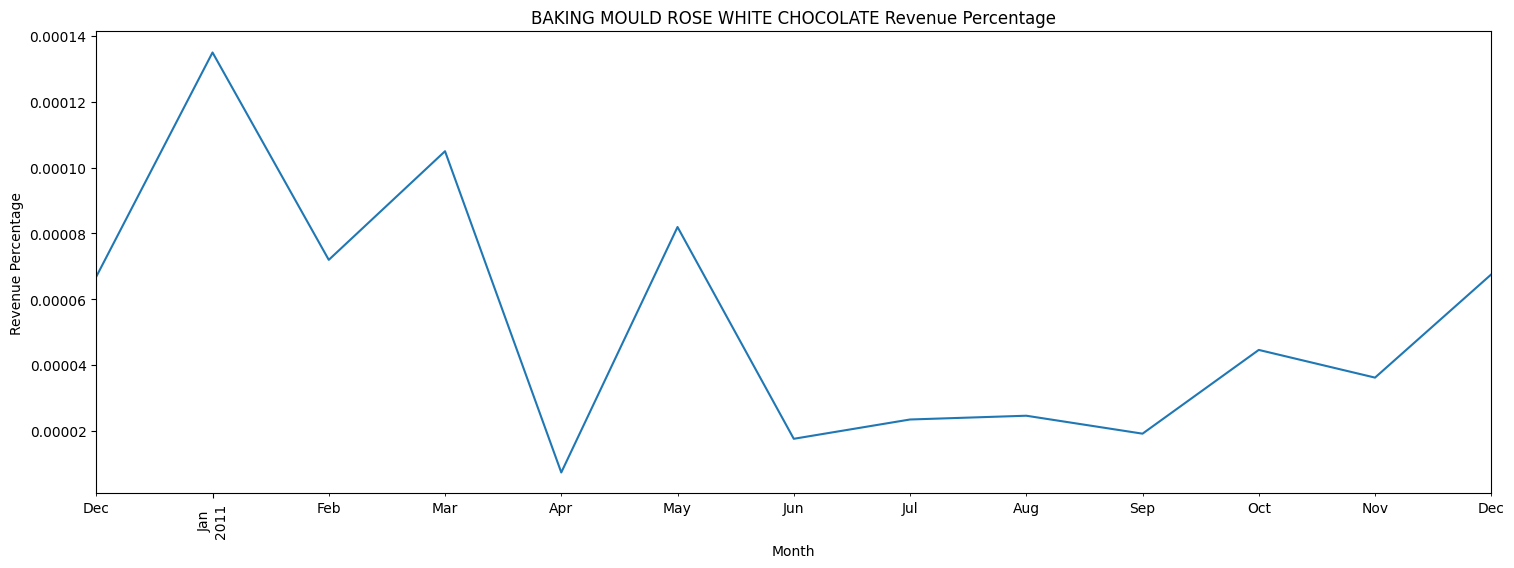

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
<ipython-input-130-c97096cb016b>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  line_chart.set_xticklabels(xlabels, rotation=90)


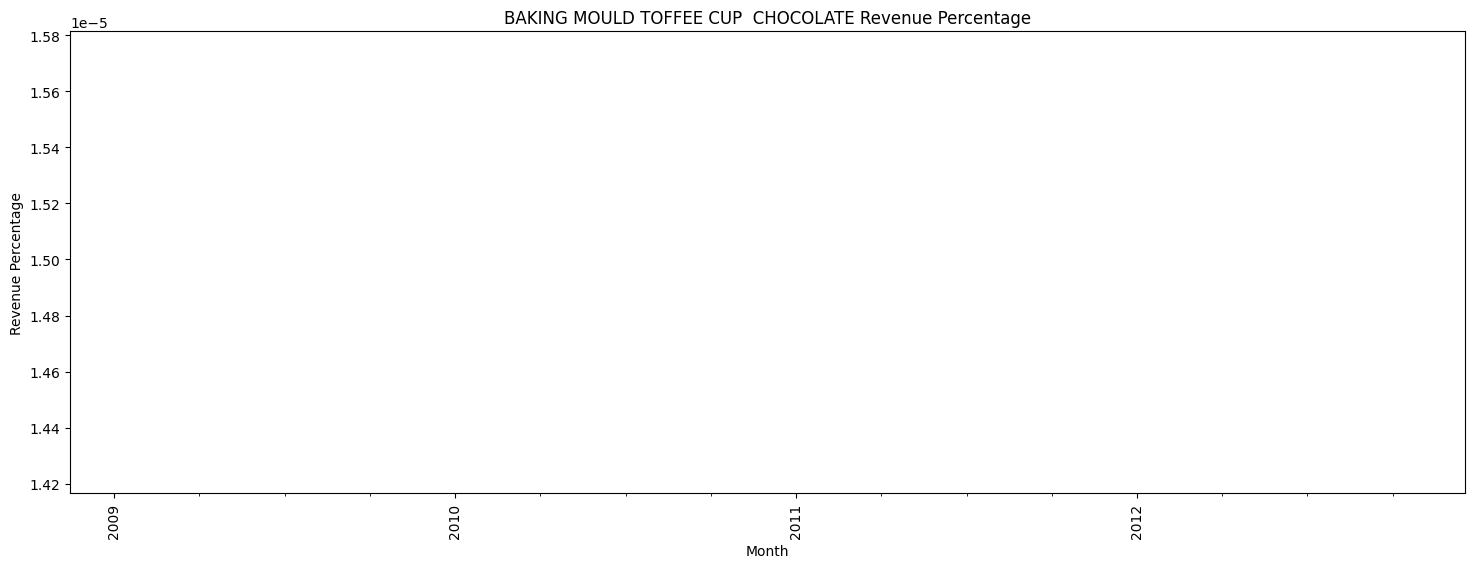

<ipython-input-130-c97096cb016b>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  line_chart.set_xticklabels(xlabels, rotation=90)


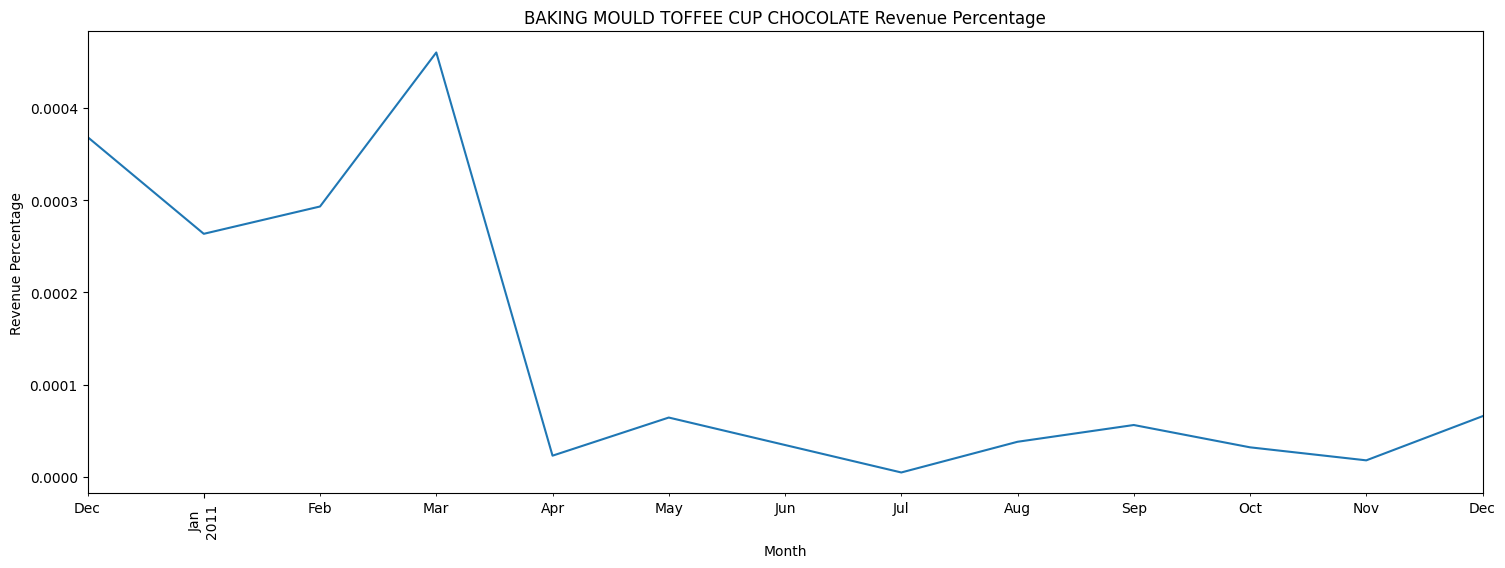

<ipython-input-130-c97096cb016b>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  line_chart.set_xticklabels(xlabels, rotation=90)


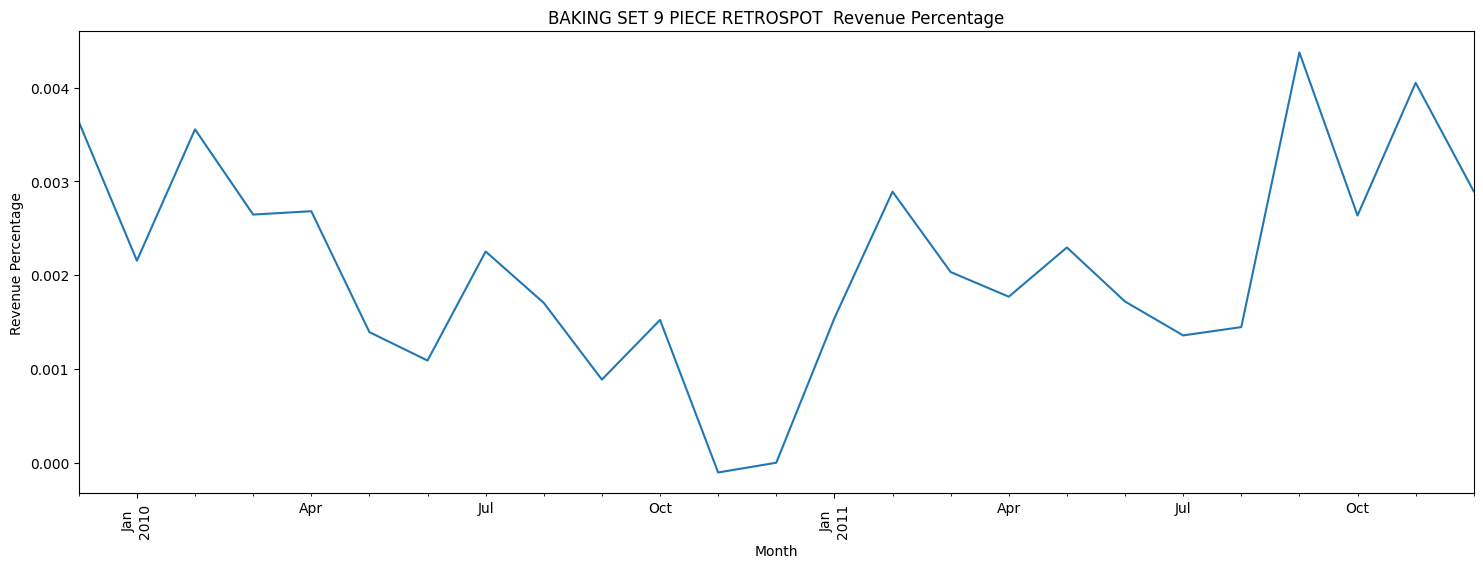

<ipython-input-130-c97096cb016b>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  line_chart.set_xticklabels(xlabels, rotation=90)


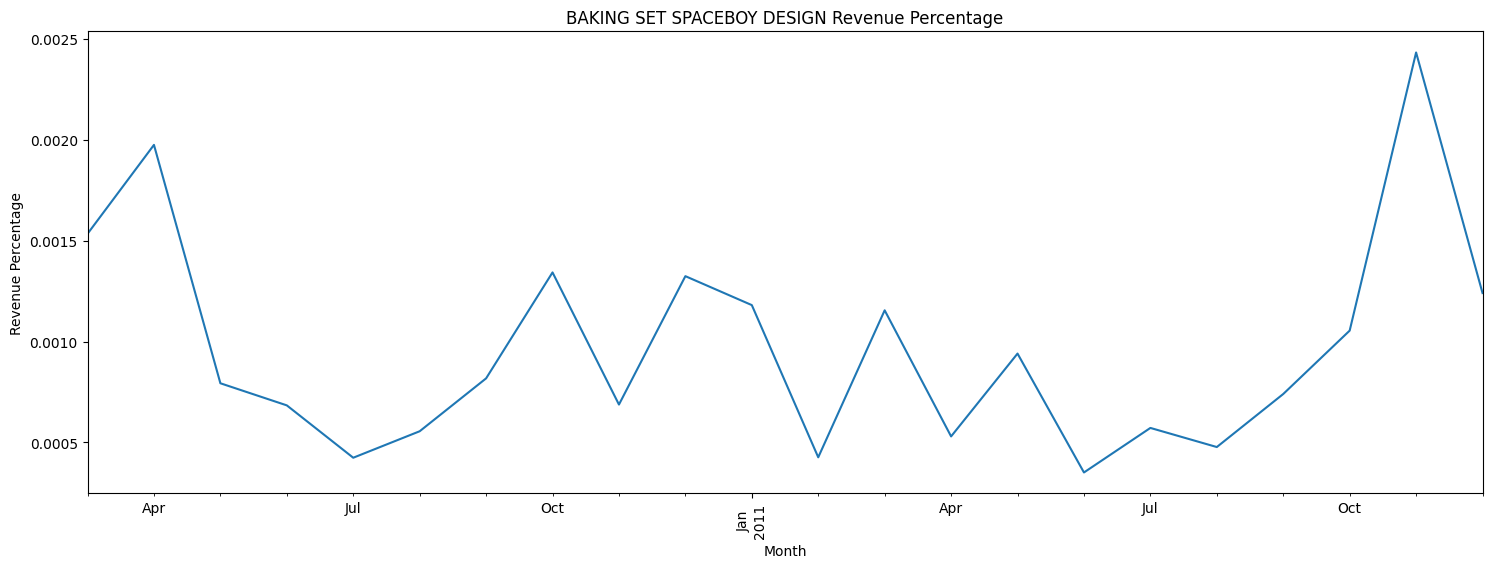

<ipython-input-130-c97096cb016b>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  line_chart.set_xticklabels(xlabels, rotation=90)


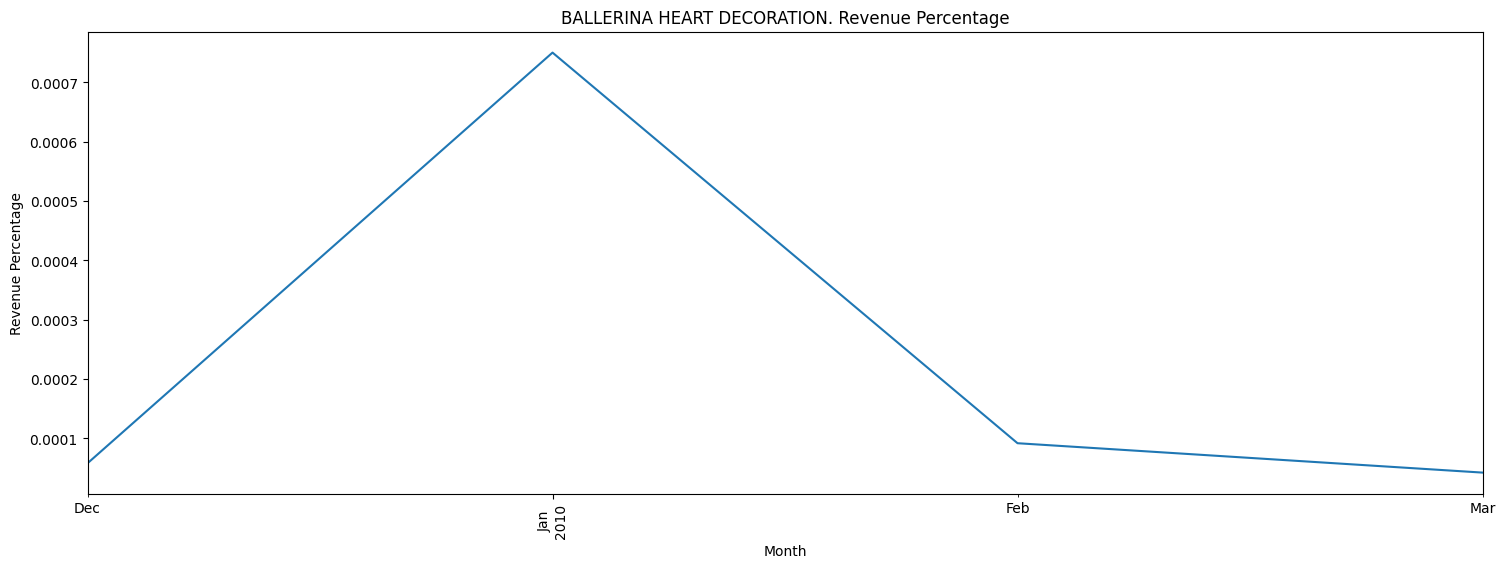

<ipython-input-130-c97096cb016b>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  line_chart.set_xticklabels(xlabels, rotation=90)


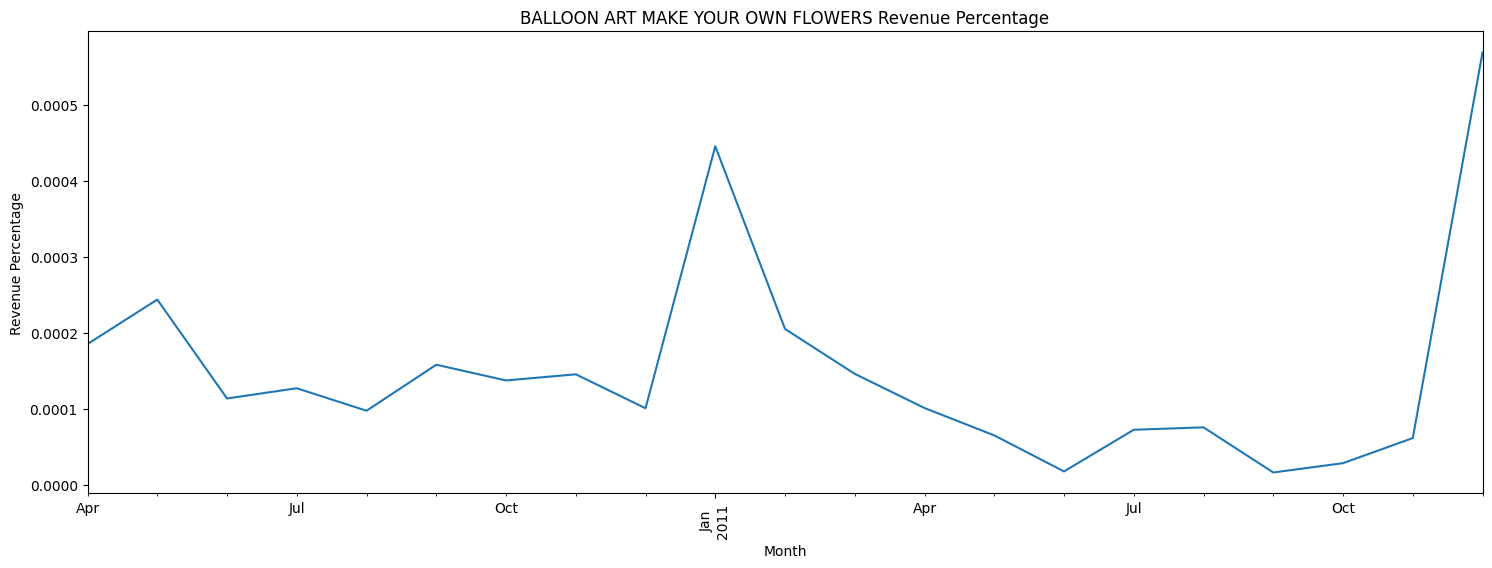

<ipython-input-130-c97096cb016b>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  line_chart.set_xticklabels(xlabels, rotation=90)


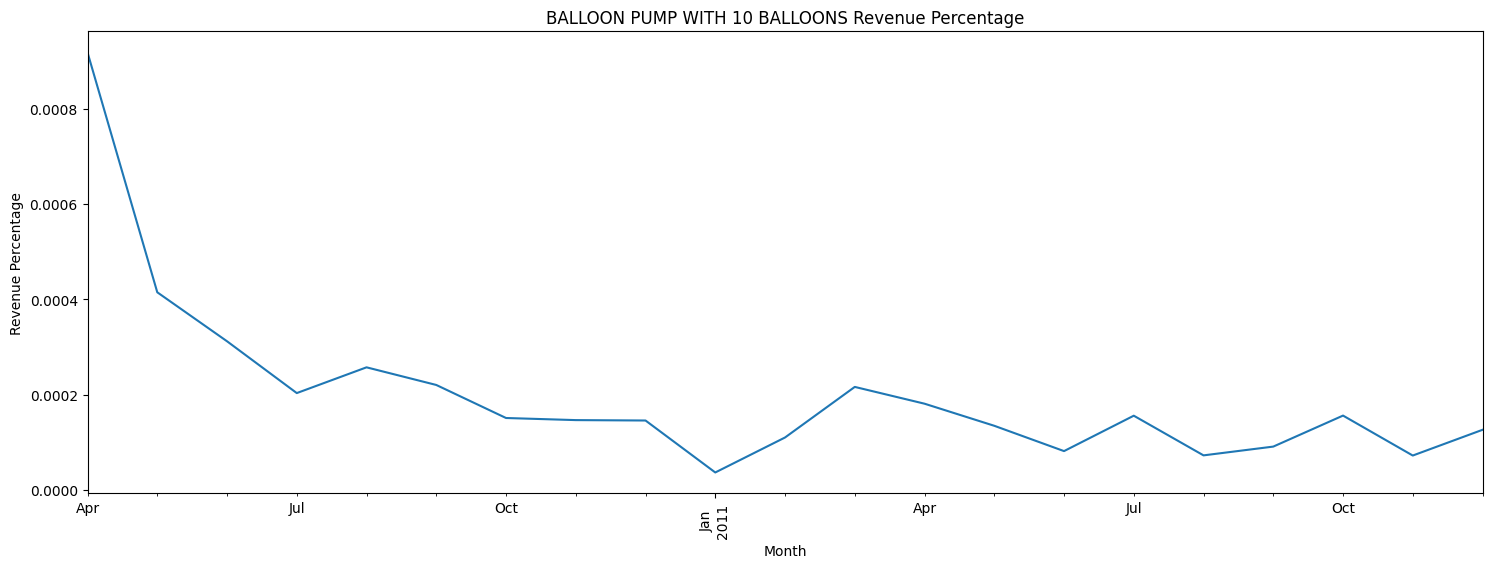

<ipython-input-130-c97096cb016b>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  line_chart.set_xticklabels(xlabels, rotation=90)


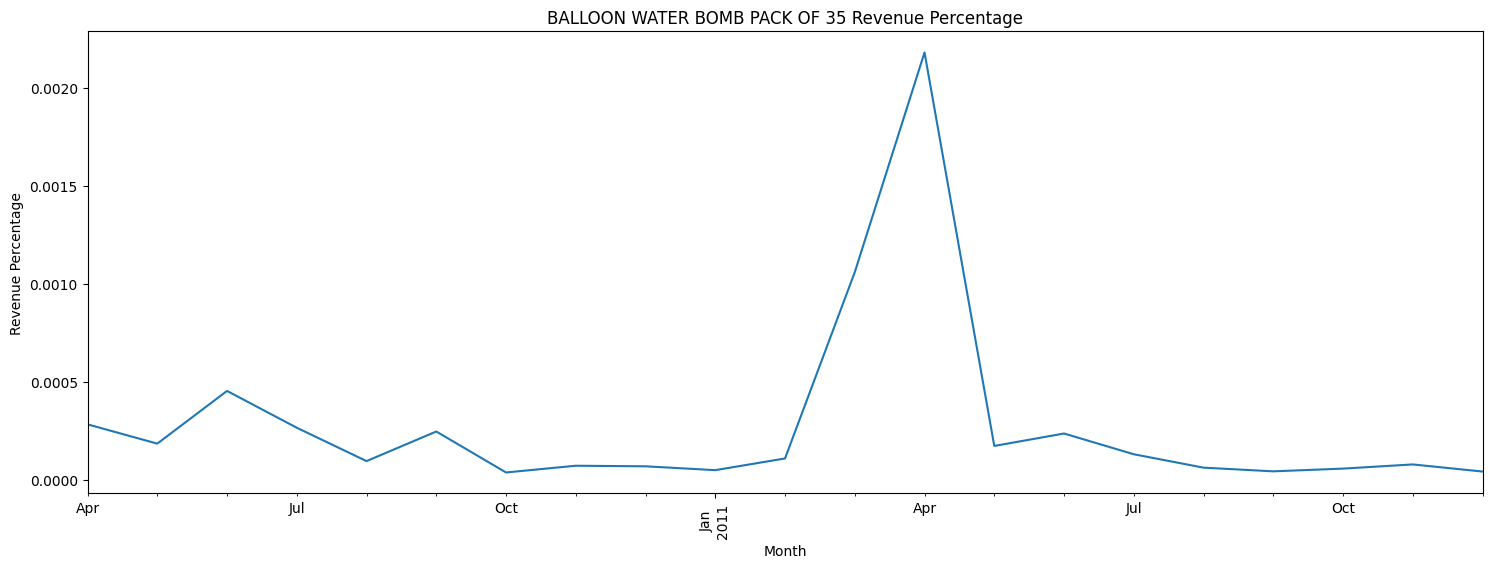

<ipython-input-130-c97096cb016b>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  line_chart.set_xticklabels(xlabels, rotation=90)


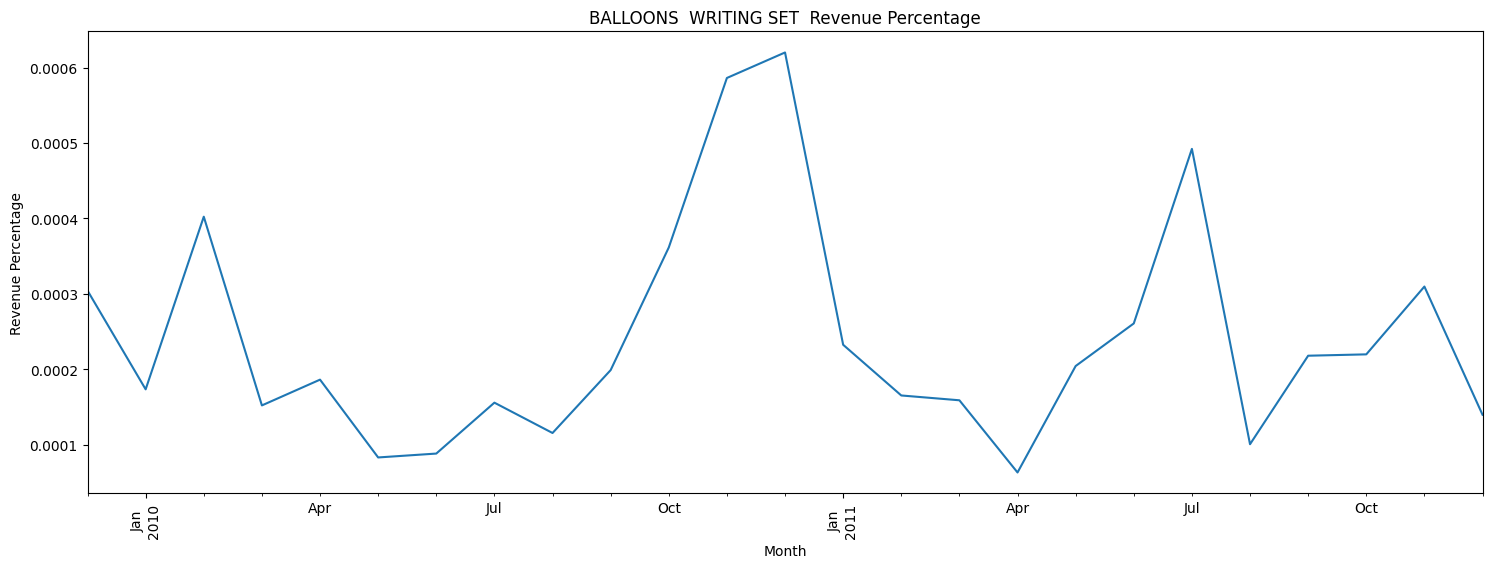

<ipython-input-130-c97096cb016b>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  line_chart.set_xticklabels(xlabels, rotation=90)


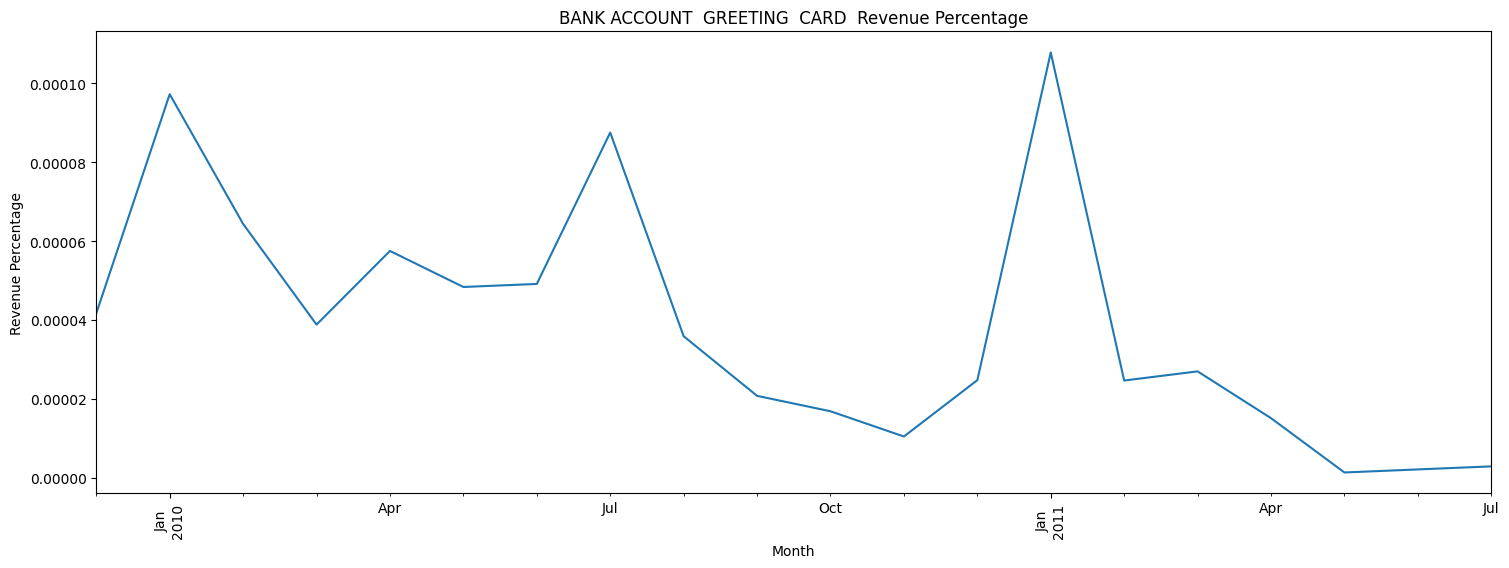

<ipython-input-130-c97096cb016b>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  line_chart.set_xticklabels(xlabels, rotation=90)


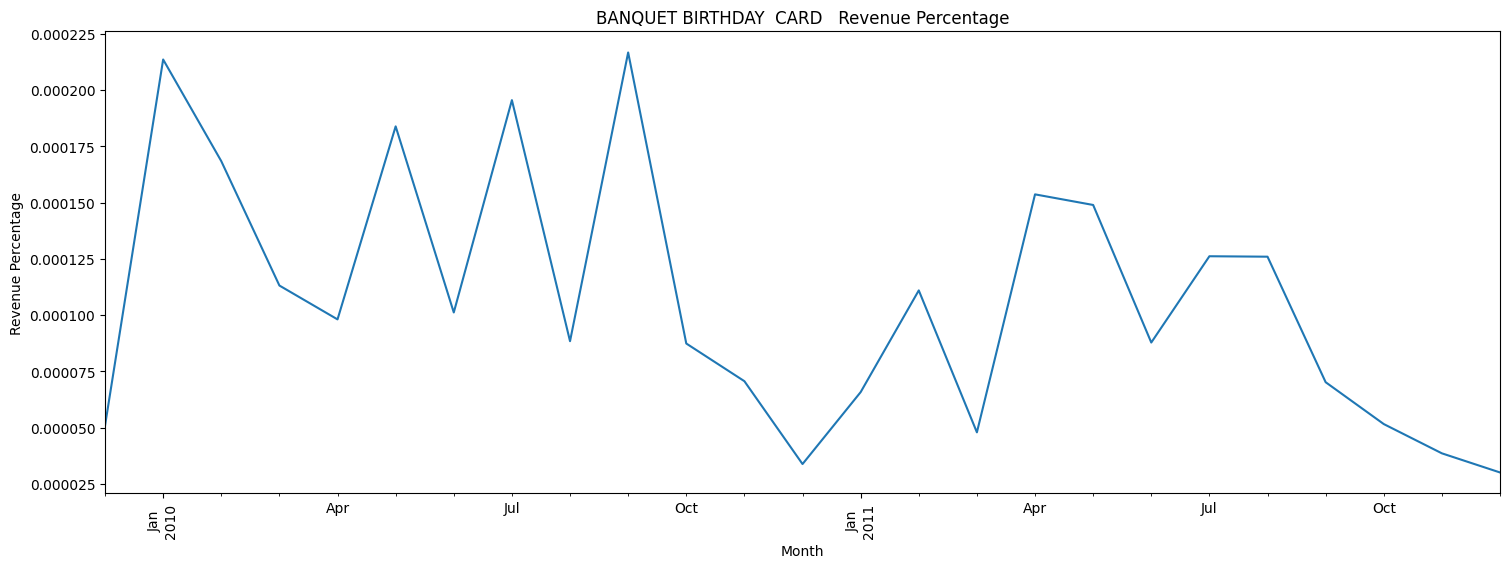

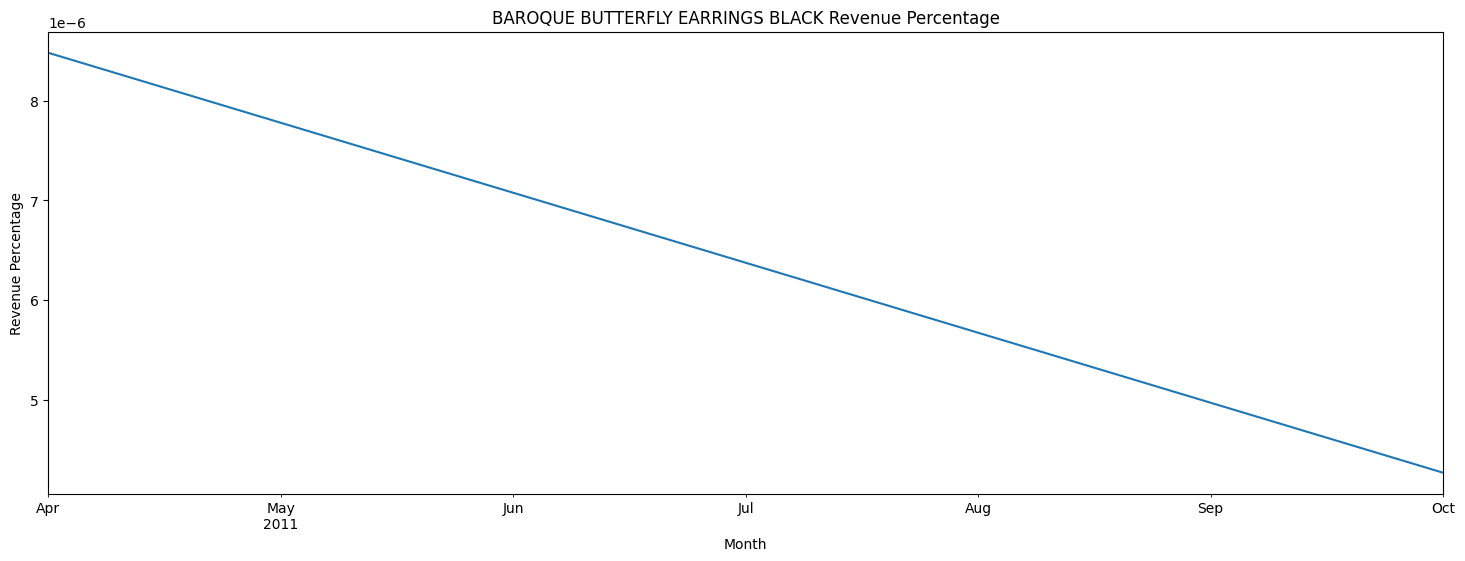

<ipython-input-130-c97096cb016b>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  line_chart.set_xticklabels(xlabels, rotation=90)


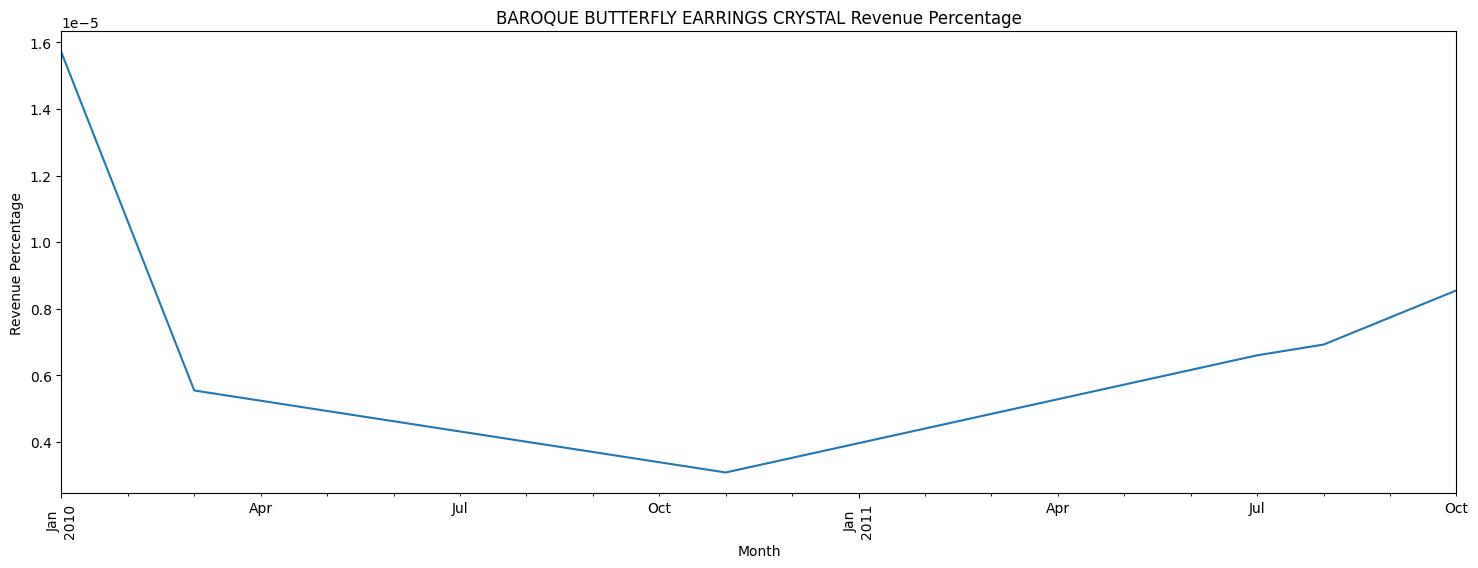

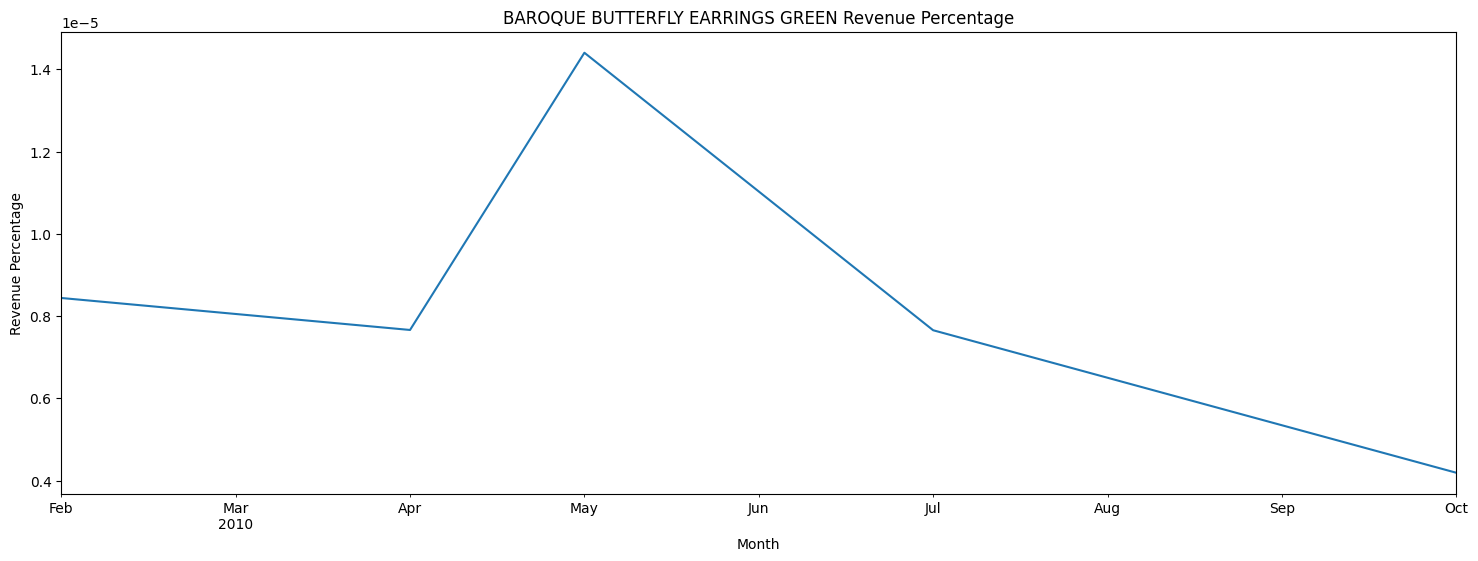

<ipython-input-130-c97096cb016b>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  line_chart.set_xticklabels(xlabels, rotation=90)


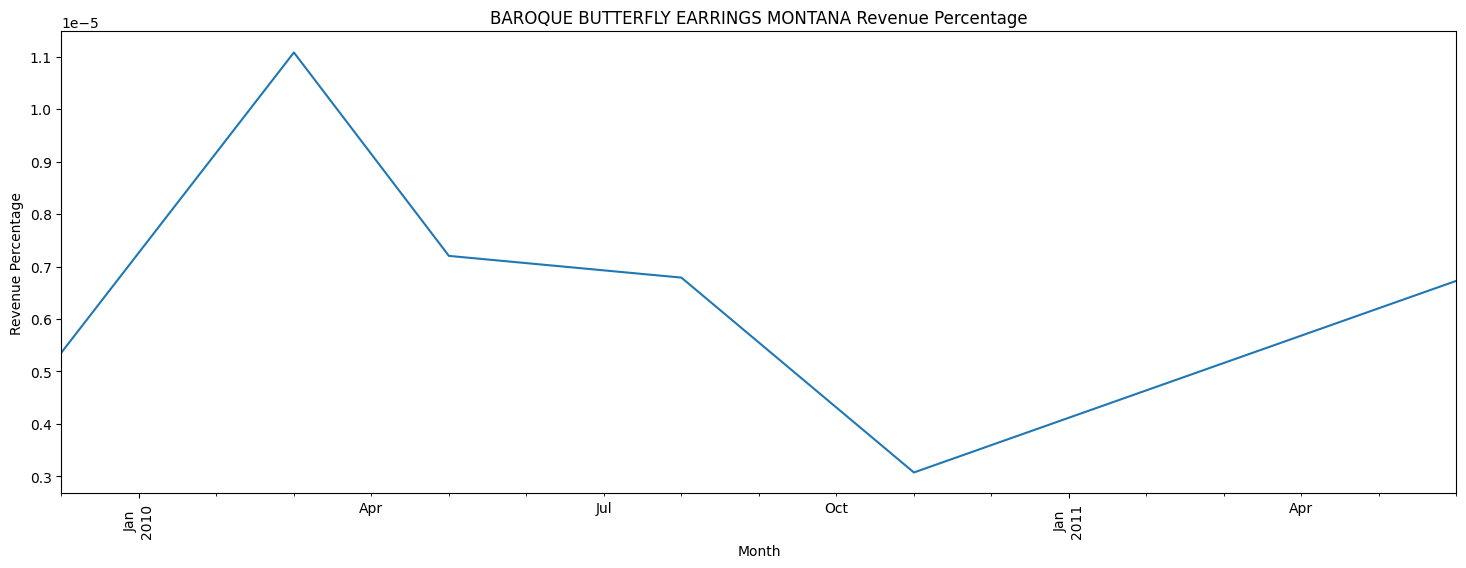

<ipython-input-130-c97096cb016b>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  line_chart.set_xticklabels(xlabels, rotation=90)


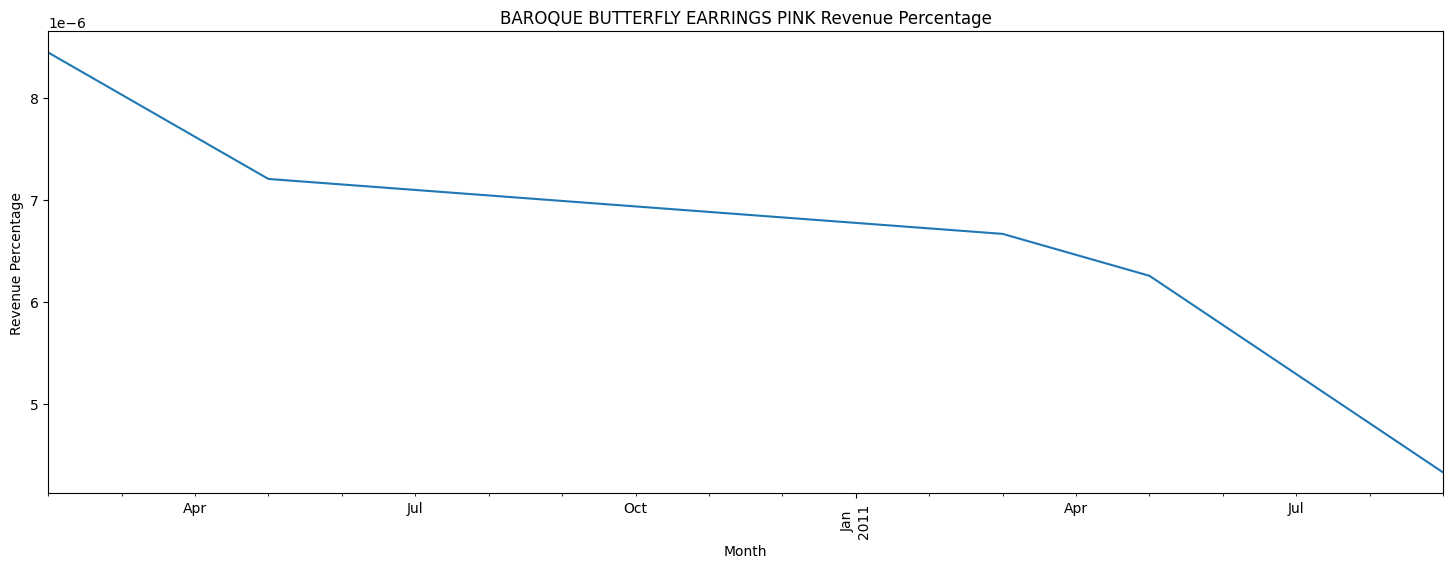

<ipython-input-130-c97096cb016b>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  line_chart.set_xticklabels(xlabels, rotation=90)


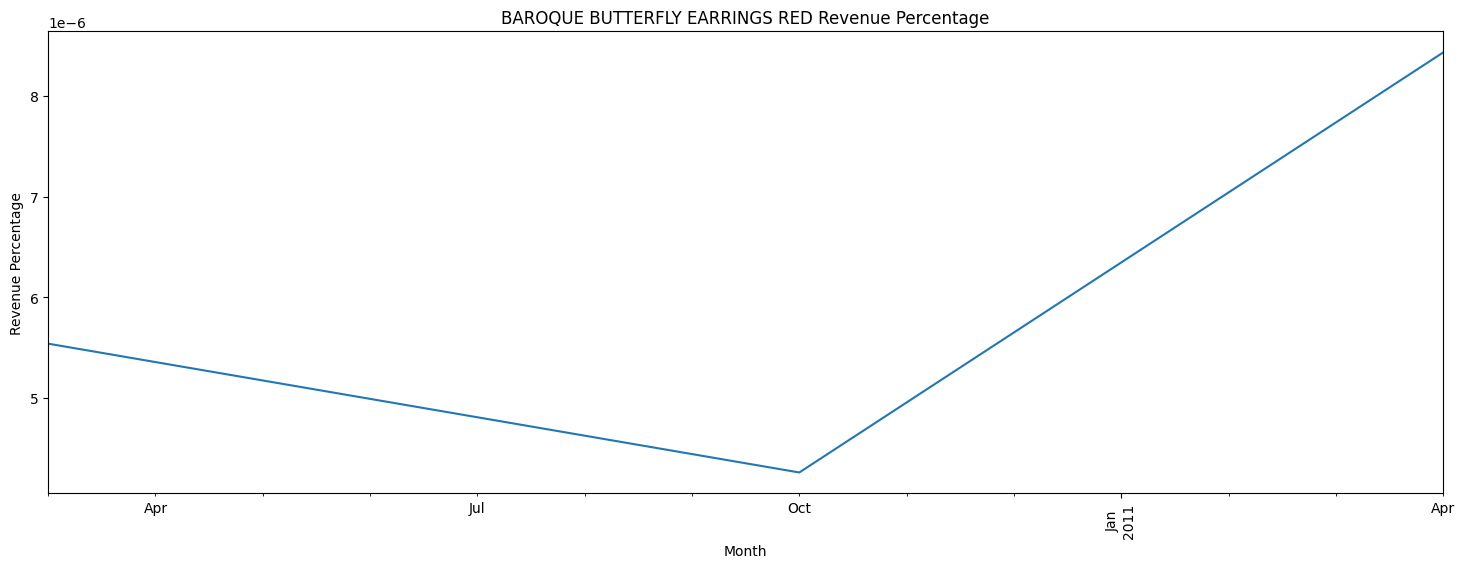

<ipython-input-130-c97096cb016b>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  line_chart.set_xticklabels(xlabels, rotation=90)


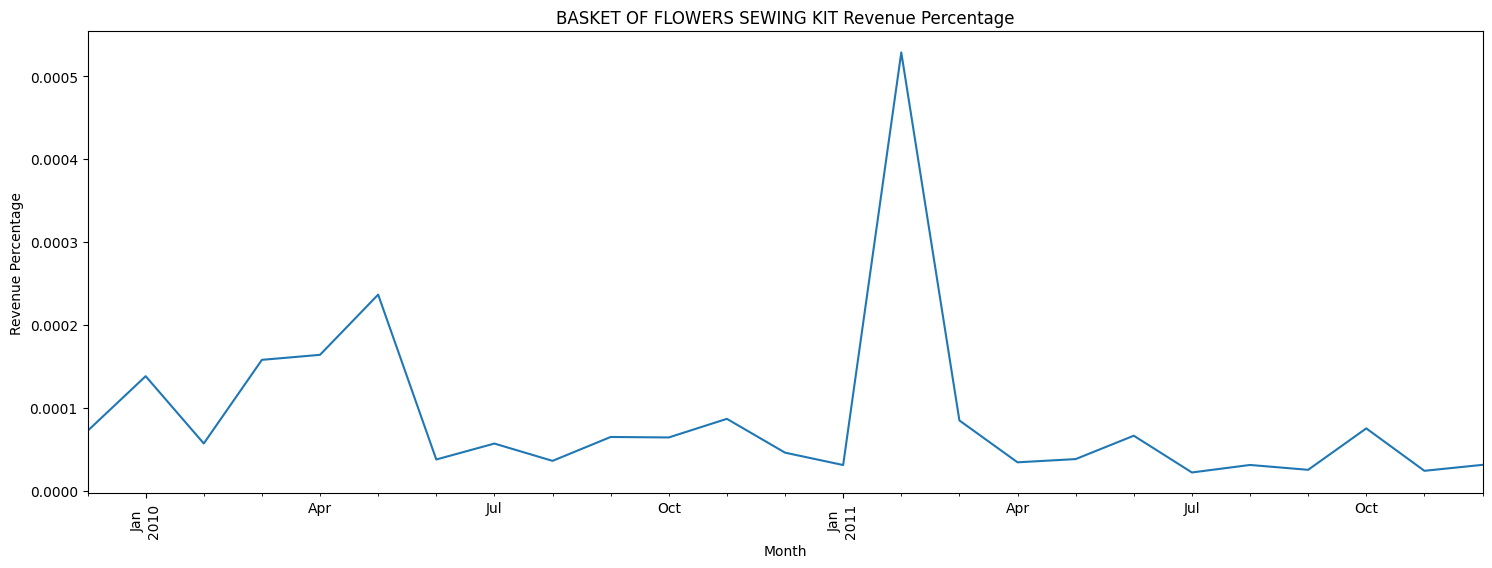

<ipython-input-130-c97096cb016b>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  line_chart.set_xticklabels(xlabels, rotation=90)


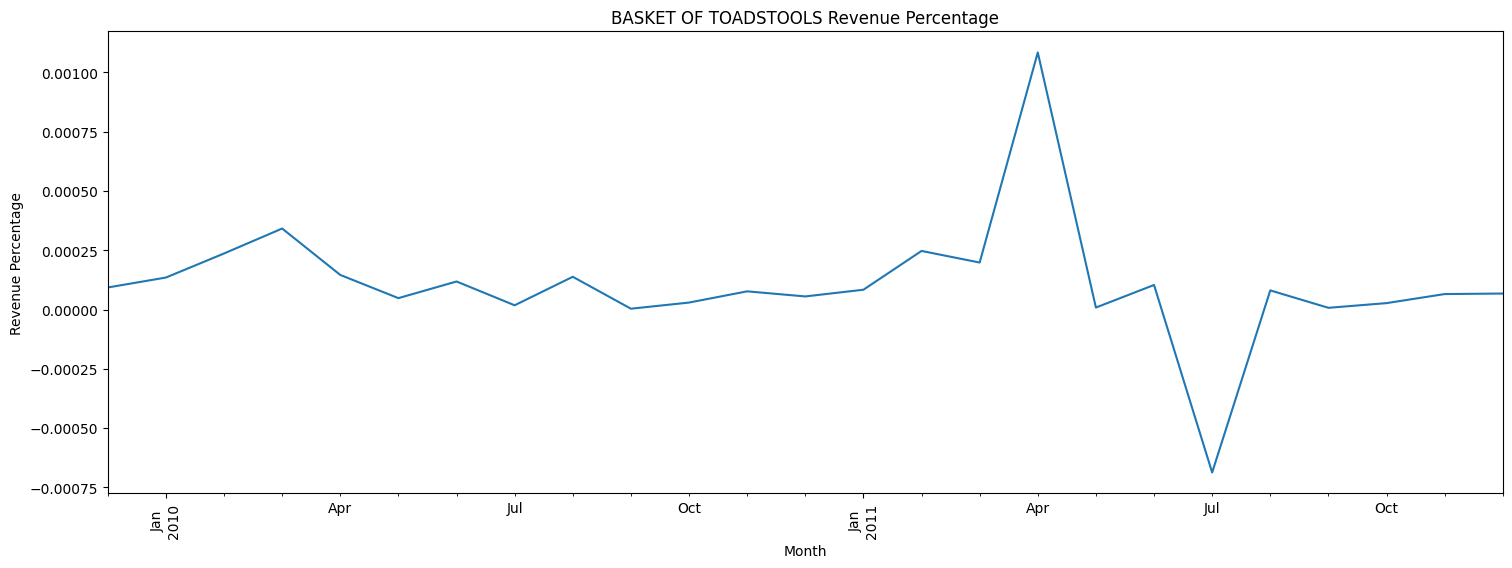

<ipython-input-130-c97096cb016b>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  line_chart.set_xticklabels(xlabels, rotation=90)


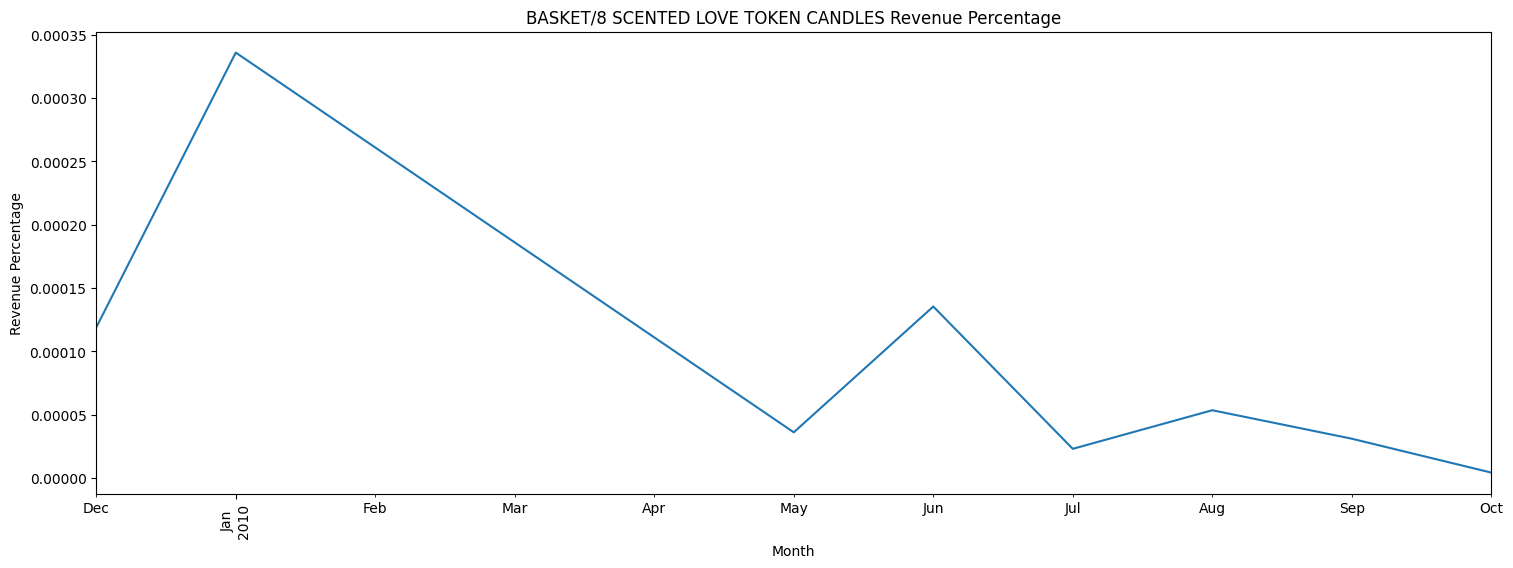

<ipython-input-130-c97096cb016b>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  line_chart.set_xticklabels(xlabels, rotation=90)


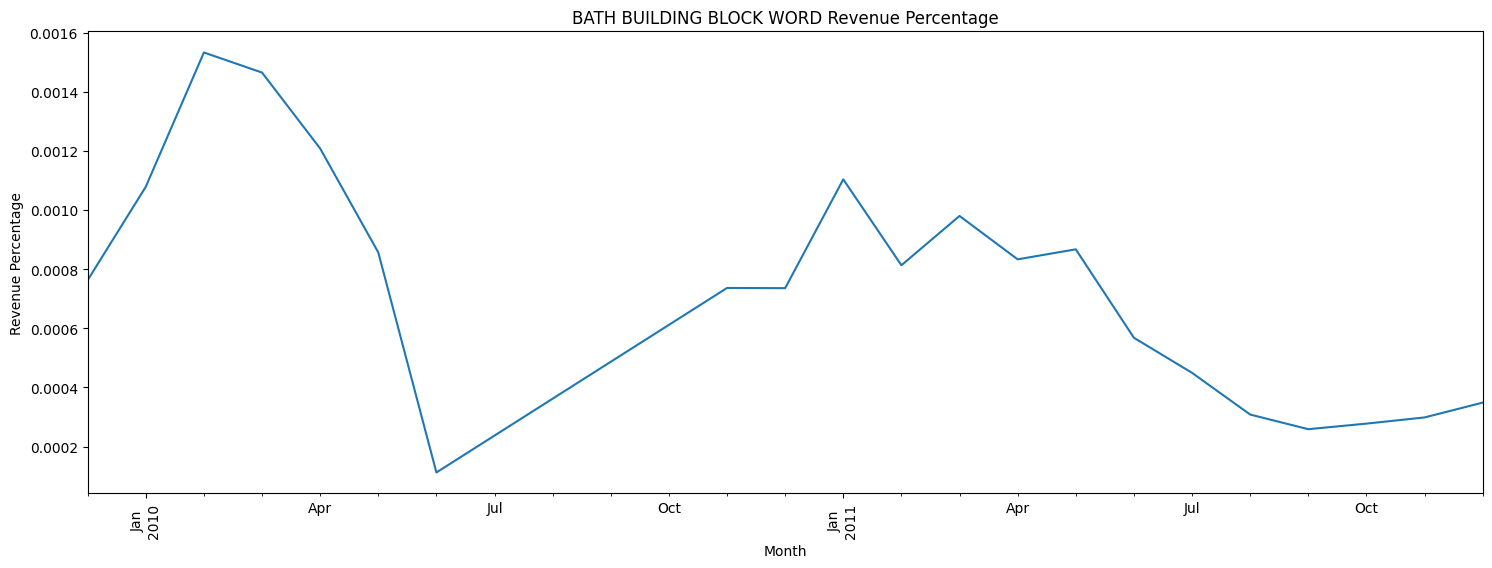

<ipython-input-130-c97096cb016b>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  line_chart.set_xticklabels(xlabels, rotation=90)


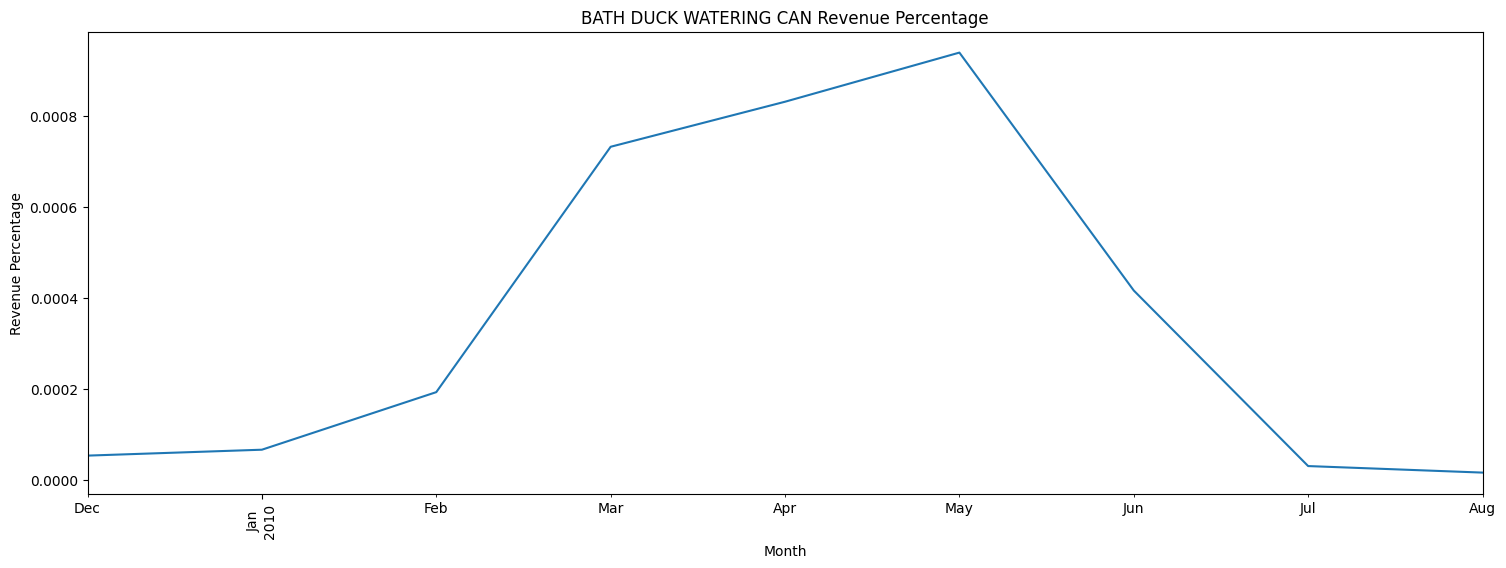

In [ ]:
# Visualize the monthly revenue percentage for each product using a line chart
for product in revenue_pct_by_product.index.get_level_values(0).unique():
    fig, ax = plt.subplots(figsize=(18, 6))
    line_chart = revenue_pct_by_product.loc[product].plot(kind='line', ax=ax)
    ax.set_title(f'{product} Revenue Percentage')
    ax.set_xlabel('Month')
    ax.set_ylabel('Revenue Percentage')
    xlabels = [label.get_text().replace('_', ' ') for label in line_chart.get_xticklabels()]
    line_chart.set_xticklabels(xlabels, rotation=90)
    plt.show()